<Figure size 1500x500 with 0 Axes>

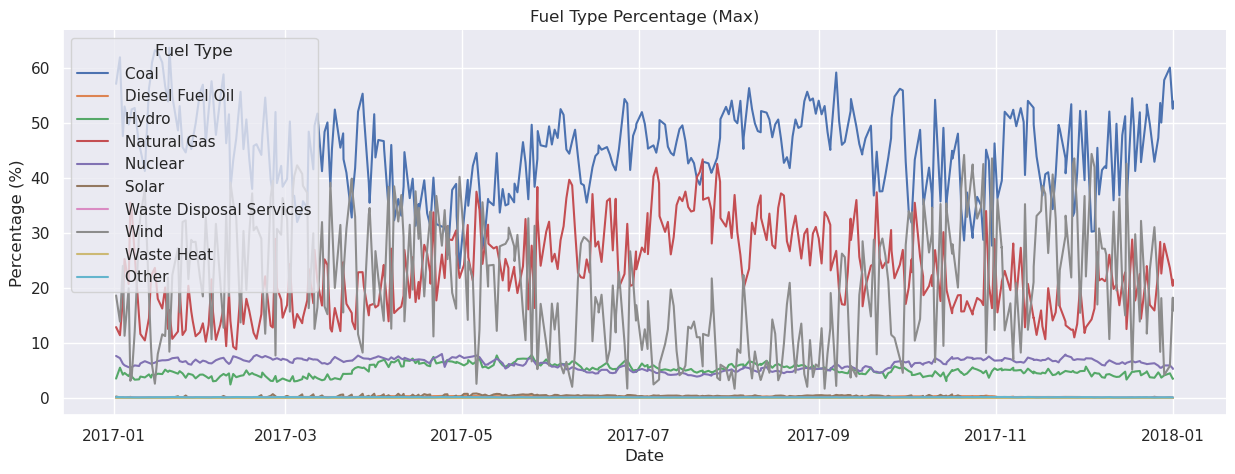

<Figure size 1500x500 with 0 Axes>

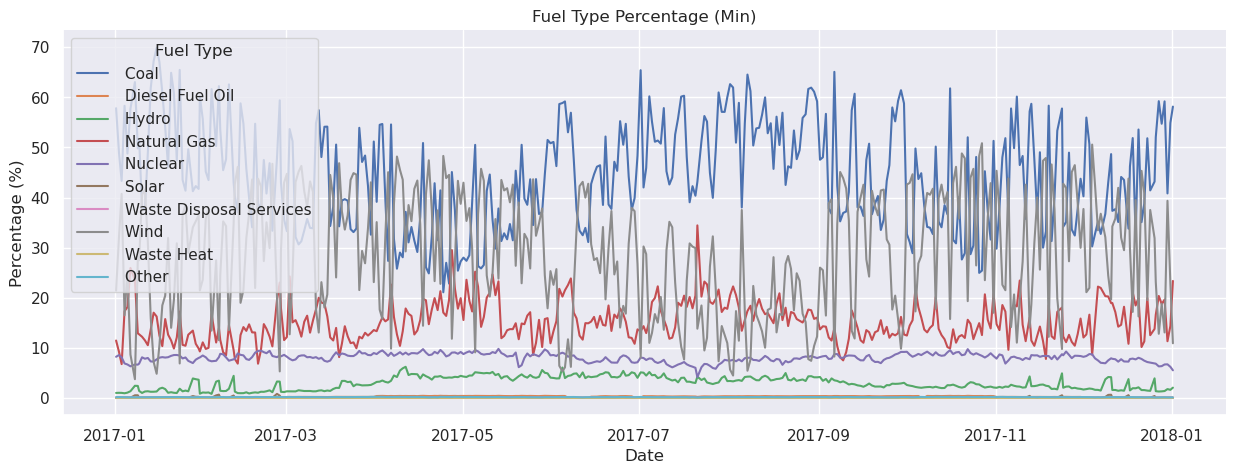

In [12]:
import pandas as pd
from plotnine import *
import matplotlib.pyplot as plt

def load_and_preprocess_data(file_path):
    # Load the data and preprocess it
    df = pd.read_csv(file_path)
    df['GMT MKT Interval'] = pd.to_datetime(df['GMT MKT Interval'])
    df['Date'] = df['GMT MKT Interval'].dt.date
    df.set_index('GMT MKT Interval', inplace=True)
    df[' Coal'] = df[' Coal Market'] + df[' Coal Self']
    return df

def resample_and_aggregate_data(df):
    agg_dictionary={
        ' Coal':'mean',
        ' Diesel Fuel Oil':'mean', 
        ' Hydro':'mean',
        ' Natural Gas':'mean',
        ' Nuclear':'mean', 
        ' Solar':'mean', 
        ' Waste Disposal Services':'mean',
        ' Wind':'mean',
        ' Waste Heat':'mean',
        ' Other':'mean',
        ' Average Actual Load':'mean',
        'Date':'last'
        }

    df_resampled_hour = df.resample('H').agg(agg_dictionary)
    df_resampled_hour.head()
    return df_resampled_hour

def plot_fuel_percentage(df, title):
    # Filter the DataFrame for selected columns
    fuel_columns = [' Coal', ' Diesel Fuel Oil', ' Hydro', ' Natural Gas', ' Nuclear', ' Solar', ' Waste Disposal Services', ' Wind', ' Waste Heat', ' Other']
    filtered_df = df[fuel_columns]

    # Calculate percentages
    percentages = filtered_df.div(filtered_df.sum(axis=1), axis=0) * 100

    # Plot using Seaborn
    sns.set(style="darkgrid")  # Set Seaborn style
    plt.figure(figsize=(15, 5))
    sns.lineplot(data=percentages, dashes=False)
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Percentage (%)')
    plt.legend(title='Fuel Type')
    sns.despine()
    plt.show()


if __name__ == '__main__':
    data_file = "GenMix_2017.csv"
    df = load_and_preprocess_data(data_file)
    df_resampled_hour = resample_and_aggregate_data(df)

    daily_min = df_resampled_hour.groupby(['Date'])[' Average Actual Load'].min()
    daily_max = df_resampled_hour.groupby(['Date'])[' Average Actual Load'].max()
    min_daily_data = df_resampled_hour[df_resampled_hour[' Average Actual Load'].isin(daily_min)]
    max_daily_data = df_resampled_hour[df_resampled_hour[' Average Actual Load'].isin(daily_max)]

    plt.figure(figsize=(15, 5))
    plot_fuel_percentage(max_daily_data, title="Fuel Type Percentage (Max)")
    plt.show()

    plt.figure(figsize=(15, 5))
    plot_fuel_percentage(min_daily_data, title="Fuel Type Percentage (Min)")
    plt.show()
